In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [75]:
df = df.iloc[:,2:]

In [76]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [77]:
df.sample(5)

,Age,EstimatedSalary,Purchased
15,29,80000,0
366,58,47000,1
245,51,146000,1
179,31,34000,0
220,41,80000,0


# Train Test split

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis = 1),
                                                df['Purchased'],
                                                test_size =0.2,
                                                random_state = 2)

# StandardScaler

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set,it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [80]:
scaler.mean_

array([3.7787500e+01, 6.9359375e+04])

In [81]:
x_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

In [82]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [83]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,37.8,69359.4
std,10.4,33969.7
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,69500.0
75%,46.0,87000.0
max,60.0,150000.0


In [84]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


# Effect of scaling

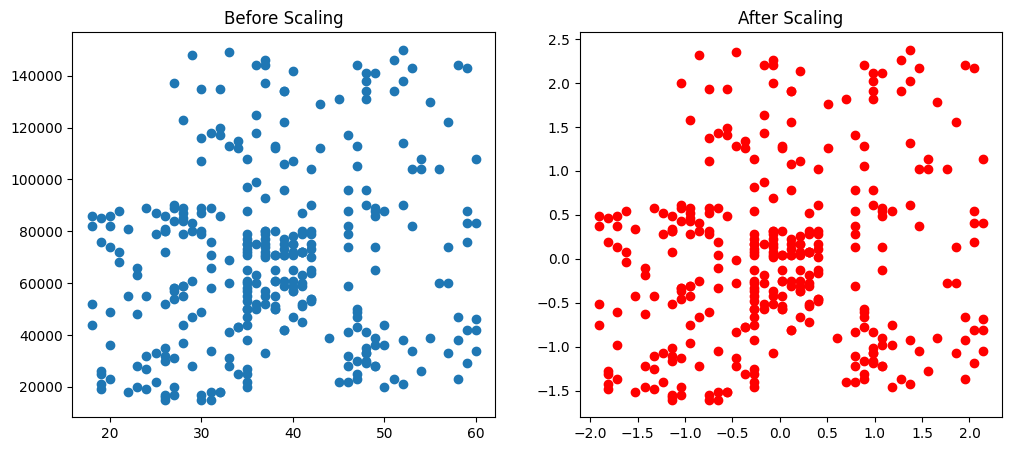

In [85]:
fig , (ax1,ax2) = plt.subplots(ncols = 2,figsize  =(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color ='red')
ax2.set_title("After Scaling")

plt.show()

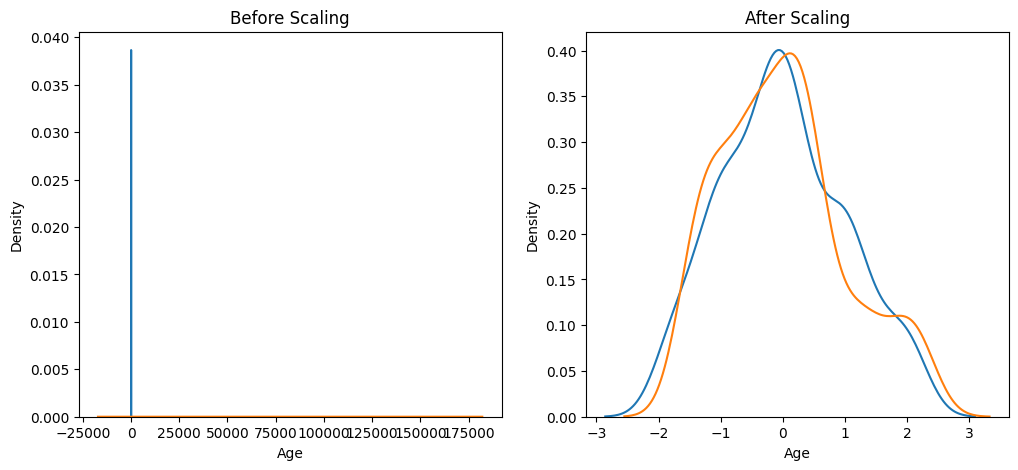

In [86]:
fig , (ax1,ax2) = plt.subplots(ncols = 2,figsize  =(12,5))


# before scaling

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'],ax = ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax = ax1)
# After scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'],ax = ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax = ax2)
plt.show()

# comparision of Distributions

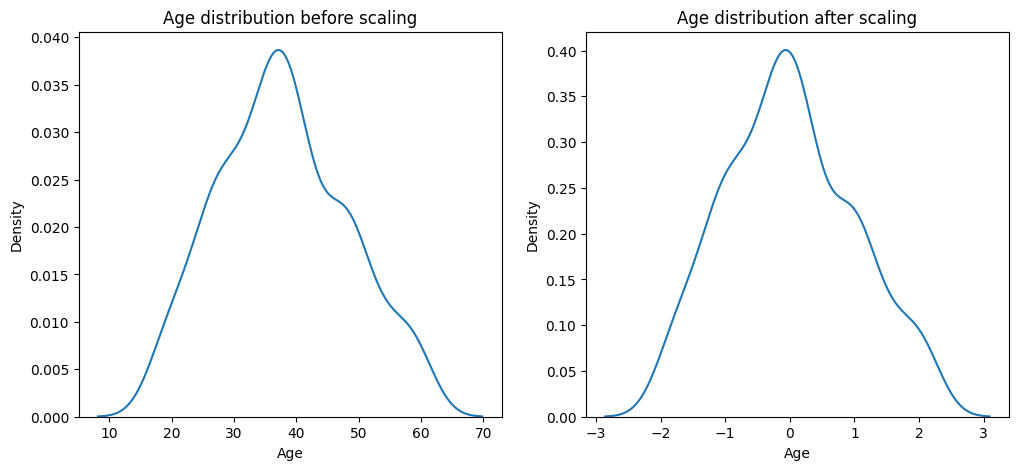

In [87]:
fig , (ax1,ax2) = plt.subplots(ncols = 2,figsize  =(12,5))


# before scaling

ax1.set_title('Age distribution before scaling')
sns.kdeplot(x_train['Age'],ax = ax1)
# After scaling
ax2.set_title("Age distribution after scaling")
sns.kdeplot(x_train_scaled['Age'],ax = ax2)
              
plt.show()

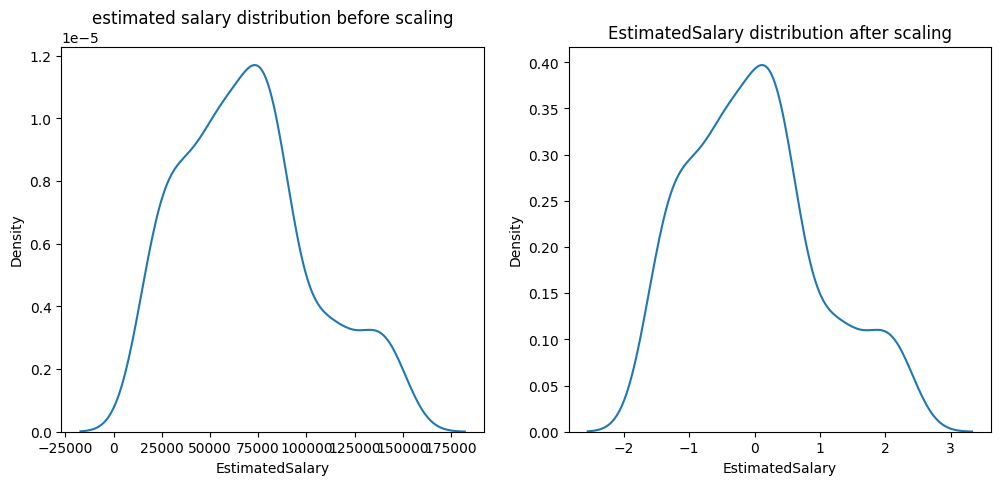

In [88]:
fig , (ax1,ax2) = plt.subplots(ncols = 2,figsize  =(12,5))


# before scaling

ax1.set_title('estimated salary distribution before scaling')
sns.kdeplot(x_train['EstimatedSalary'],ax = ax1)
# After scaling
ax2.set_title("EstimatedSalary distribution after scaling")
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax = ax2)
              
plt.show()

# why sclaing is important

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [90]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [91]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [92]:
from sklearn.metrics import accuracy_score
print('Actual :',accuracy_score(y_test,y_pred))
print('Scaled :',accuracy_score(y_test,y_pred_scaled))

Actual : 0.8125
Scaled : 0.8125


In [93]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [94]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [95]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt.predict(x_test_scaled)

In [96]:
print('Actual :',accuracy_score(y_test,y_pred))
print('Scaled :',accuracy_score(y_test,y_pred_scaled))

Actual : 0.85
Scaled : 0.6


In [97]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000
